In [373]:
!pip install kneed
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [374]:
#Reading excel data and putting it into a dataframe using pandas
df= pd.read_excel("GenshinFinalRev.xlsx")
df.dropna(inplace=True)
Rev= df[['Avg Revenue/Day','Revenue']]
Rev.head()

,Avg Revenue/Day,Revenue
0,1.225310e+06,30632752.0
1,1.034095e+06,22750080.0
2,6.721809e+05,13443619.0
3,7.393133e+05,16264892.0
4,5.626718e+05,11816107.0


In [375]:
#making sure revenue data type is in float
print(df.dtypes)

Version              float64
Version Name          object
Start Date            object
End Date              object
5 Star Characters     object
Rerun                float64
Mixed                 object
Revenue              float64
Banner Days          float64
Avg Revenue/Day      float64
dtype: object


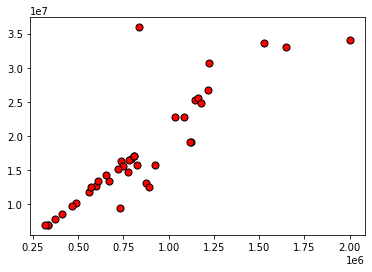

In [376]:
#plotting the data
plt.scatter(Rev.iloc[:, 0], Rev.iloc[:, 1], c='red', marker='o', edgecolor='black', s=50)
plt.show()

In [377]:
#training K-Means clustering
km = KMeans(n_clusters=3, init='k-means++',n_init=10, max_iter=300,tol=1e-04, random_state=0)
y_predict = km.fit_predict(X)
y_predict

array([0, 0, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 0, 2, 2, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1])

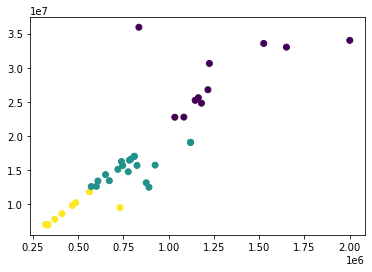

In [378]:
#plotting the trained K-Means clustering
plt.scatter(Rev.iloc[:,0],Rev.iloc[:,1],c=y_predict)

In [379]:
X['cluster'] = y_predict
X.head()

,Avg Revenue/Day,Revenue,cluster
0,1.225310e+06,30632752.0,0
1,1.034095e+06,22750080.0,0
2,6.721809e+05,13443619.0,1
3,7.393133e+05,16264892.0,1
4,5.626718e+05,11816107.0,2


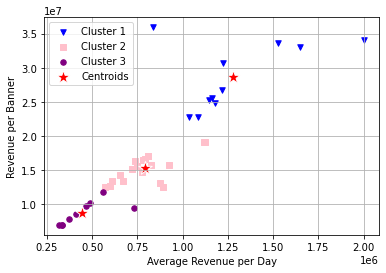

In [380]:
# plot the 3 clusters
plt.scatter(Rev.iloc[y_predict == 0, 0], Rev.iloc[y_predict == 0, 1], s=30, c='blue', marker='v', edgecolor='blue', label='Cluster 1')

plt.scatter(Rev.iloc[y_predict == 1, 0], Rev.iloc[y_predict == 1, 1], s=30, c='pink', marker='s', edgecolor='pink', label='Cluster 2')

plt.scatter(Rev.iloc[y_predict == 2, 0], Rev.iloc[y_predict == 2, 1], s=30, c='purple', marker='o', edgecolor='purple', label='Cluster 3')

# plot the centroids
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=200, marker='*', c='red', edgecolor='white', label='Centroids')
plt.legend(scatterpoints=1)
plt.xlabel('Average Revenue per Day')
plt.ylabel('Revenue per Banner')

plt.grid()
plt.show()

In [381]:
#calculate distortion for a range of number of cluster
distortions= []
for k in range(1,11):
    km = KMeans(n_clusters=k, init = 'k-means++', max_iter = 300, n_init = 10, tol=1e-04, random_state = 0)
    km.fit(Rev)
    distortions.append(km.inertia_)
print(distortions)

C:\Users\tiffa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[2489401737122591.5, 598483966657044.1, 336732165123649.0, 126402004280163.06, 65818306395967.81, 50958509158676.125, 39926784774978.016, 30100780917593.242, 19219811773536.887, 13978523975819.203]


In [382]:
#Elbow
kl = KneeLocator(range(1, 11), distortions, curve="convex", direction="decreasing")
kl.elbow

2

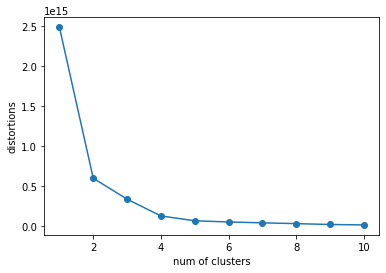

In [383]:
#Draw elbow plot and from that figure out optimal value of k plot
plt.xlabel('num of clusters')
plt.ylabel('distortions')
plt.plot(range(1,11), distortions, marker='o')

#the optimal value of k is 2.
